# Multi Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
features = ['Age', 'Loan Amount Request (USD)', 'Credit Score', 'Co-Applicant']
label = 'Loan Sanction Amount (USD)'

column_names = features
column_names.append(label)
df = pd.read_csv('data/train.csv', usecols=column_names)
df.head()

,Age,Loan Amount Request (USD),Credit Score,Co-Applicant,Loan Sanction Amount (USD)
0,56,72809.58,809.44,1,54607.18
1,32,46837.47,780.40,1,37469.98
2,65,45593.04,833.15,0,36474.43
3,65,80057.92,832.70,1,56040.54
4,31,113858.89,745.55,1,74008.28


(30000, 5)


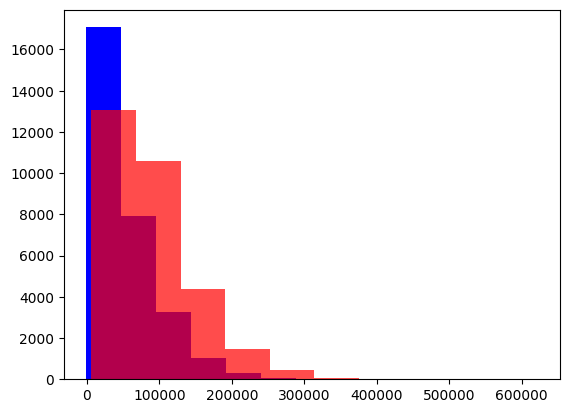

In [ ]:
print(df.shape)
plt.hist(df['Loan Sanction Amount (USD)'],color='blue',)
plt.hist(df['Loan Amount Request (USD)'],color='red', alpha=0.7)
plt.show()

In [ ]:
df.dropna(inplace=True)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
class MultiLinearRegressionV4:
    def fit(self, df, features, label):
        x1 = np.ones((df.shape[0], 1))
        x2 = np.array(df[features[0]]).reshape(-1, 1)
        x3 = np.array(df[features[1]]).reshape(-1, 1)
        x4 = np.array(df[features[2]]).reshape(-1, 1)
        x5 = np.array(df[features[3]]).reshape(-1, 1)

        X = np.hstack((x1, x2, x3, x4, x5))
        XTX = np.dot(X.T, X)

        self.coefficients = np.dot(np.dot(np.linalg.inv(XTX), X.T), df[label])
        return self.coefficients

    def predict(self, features):
        testData = features.values
        return self.coefficients[0] + testData[0] * self.coefficients[1] + testData[1] * self.coefficients[2] + testData[2] * self.coefficients[3] + testData[3] * self.coefficients[4]


In [ ]:
MLR = MultiLinearRegressionV4()


val = 2
model = MLR.fit(df, features, label)
prediction = MLR.predict(df[features].iloc[val])

print("Prediction:", prediction)
print("Actual Value: ", df[label][val])
print("Difference: ", df[label][val] - prediction)

Prediction: 37996.91509871707
Actual Value:  36474.43
Difference:  -1522.485098717072


Lower values of MAE, MSE, and RMSE indicate better performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate predictions for all data points
predictions = df.apply(lambda row: MLR.predict(row[features]), axis=1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df[label], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df[label], predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 21917.007647669183
Mean Squared Error (MSE): 984490091.1651338
Root Mean Squared Error (RMSE): 31376.585078130058
